# Import related functions

In [1]:
import sys
sys.path.append(r'./script/')
import pandas as pd
from ECMpy_function import *

# kcat CDF

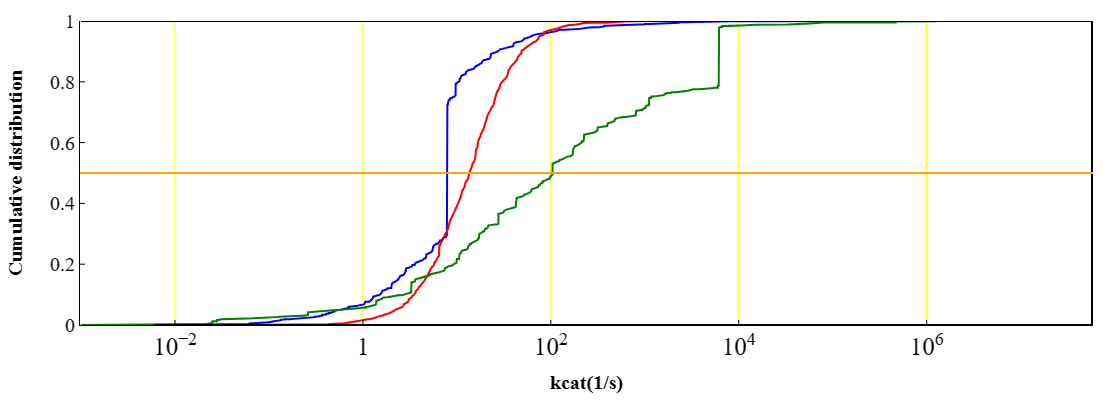

In [48]:
import pandas as pd
import plotly.graph_objects as go

def draw_cdf_fig_kcat(data_cdf_data, output_file, x_name, y_name, y_index, nticks):
    trace1 = go.Scatter(x=data_cdf_data['kcat_MW'], y=y_index, mode='lines', marker={'color': 'blue'}, name='DLkcat')
    trace2 = go.Scatter(x=data_cdf_data['kcat_MW2'], y=y_index, mode='lines', marker={'color': 'red'}, name='TurNup24_1')
    trace3 = go.Scatter(x=data_cdf_data['kcat_MW3'], y=y_index, mode='lines', marker={'color': 'green'}, name='AP')
    data1 = [trace1, trace2, trace3]

    shapes = [
        dict(type='line', x0=data_cdf_data['kcat_MW2'].max(), x1=data_cdf_data['kcat_MW2'].max(), y0=0, y1=1, line=dict(color='black', width=2)),
        dict(type='line', x0=data_cdf_data['kcat_MW3'].min(), x1=data_cdf_data['kcat_MW2'].max(), y0=1, y1=1, line=dict(color='black', width=2)),
        dict(type='line', x0=data_cdf_data['kcat_MW'].min(), x1=data_cdf_data['kcat_MW2'].max(), y0=0, y1=0, line=dict(color='black', width=2)),
    ]

    layout = go.Layout(
        plot_bgcolor='white',
        xaxis=dict(title=dict(text=x_name, font=dict(color='black', size=20, family='Times New Roman')),
                   type="log", rangemode="tozero", tickfont=dict(color='black', size=20, family='Times New Roman'),
                   linecolor='black', ticks='inside', tickcolor='black', zeroline=False,
                   showexponent='all', exponentformat="power", gridcolor="yellow"),
        xaxis2=dict(linecolor='black', showticklabels=False, type="log",
                    tickfont=dict(color='black', size=20, family='Times New Roman'),
                    rangemode="tozero", overlaying='x', side='top', nticks=nticks, zeroline=False,
                    showexponent='all', exponentformat="power", gridcolor="white"),
        yaxis=dict(title=dict(text=y_name, font=dict(color='black', size=20, family='Times New Roman')), range=[0, 1],
                   showgrid=False, zeroline=False, rangemode="tozero",
                   tickfont=dict(color='black', size=20, family='Times New Roman'),
                   ticks='inside', tickcolor='black', linecolor='black'),
        yaxis2=dict(range=[0, 1], linecolor='black', showgrid=False, zeroline=False,
                    tickfont=dict(color='black', size=20, family='Times New Roman'),
                    showticklabels=False, overlaying='y', side='right'),
        showlegend=False, height=400, width=450,
        margin=go.layout.Margin( r=10, b=10, t=10),
        shapes=shapes  # Add border lines
        
    )

    fig = go.Figure(data1, layout=layout)
    fig.add_hline(y=0.5, line_width=2, line_color="orange")
    fig.write_image(output_file)
    return fig

# Your existing code for reading and rounding data
# Read data
reaction_kcat_MW = pd.read_csv('./get_reaction_kcat/kcat/reaction_change_by_C13_DLkcat.csv')#enzyme data for eciYW1475_DL
reaction_kcat_MW = round(reaction_kcat_MW, 3)

reaction_kcat_MW2 = pd.read_csv('./get_reaction_kcat/kcat/reaction_change_by_enzuse_TurNup24_1.csv')#enzyme data for eciYW1475_TN
reaction_kcat_MW2 = round(reaction_kcat_MW2, 3)

reaction_kcat_MW3 = pd.read_csv('./get_reaction_kcat/kcat/reaction_change_by_C13_AP.csv')#enzyme data for eciYW1475_AP
reaction_kcat_MW3 = round(reaction_kcat_MW3, 3)

# Sort and reset index for all datasets
reaction_kcat_MW = reaction_kcat_MW.sort_values(by='kcat', axis=0).reset_index(drop=True)
reaction_kcat_MW2 = reaction_kcat_MW2.sort_values(by='kcat', axis=0).reset_index(drop=True)
reaction_kcat_MW3 = reaction_kcat_MW3.sort_values(by='kcat', axis=0).reset_index(drop=True)
# Sort and reset index for the combined dataset
reaction_kcat_select = pd.concat([reaction_kcat_MW['kcat'], reaction_kcat_MW2['kcat'], reaction_kcat_MW3['kcat']],
                                  axis=1, keys=['kcat_MW', 'kcat_MW2', 'kcat_MW3'])
reaction_kcat_select = reaction_kcat_select.reset_index(drop=True)  # Reset index

reaction_kcat_dis_file='kcat_CDF.png'
x_name = "<b>kcat(1/s)<b>"
y_name = "<b>Cumulative distribution<b>"
nticks = 1000
y_index = reaction_kcat_select.index / (len(reaction_kcat_select) - 1)
fig = draw_cdf_fig_kcat(reaction_kcat_select, reaction_kcat_dis_file, x_name, y_name, y_index, nticks)
fig.show()


In [6]:
def draw_cdf_fig_mw(data_cdf_data,output_file,x_name,y_name,y_index,nticks):
    trace0 = go.Scatter(x=data_cdf_data,y=y_index,marker={'color': 'blue'},mode='lines',line={'color': 'blue', 'width': 3},xaxis='x2',yaxis="y2")
    trace1 = go.Scatter(x=data_cdf_data,y=y_index,marker={'color': 'blue'},mode='lines',line={'color': 'blue', 'width': 3},xaxis='x2',yaxis="y2")
    data1 = [trace0,trace1]
    layout = go.Layout(plot_bgcolor='white',
            xaxis=dict(title=dict(text=x_name,font=dict(color='black',size=20, family='Times New Roman')),range=[0.89, 3.3],
                   type="log",rangemode="tozero",tickfont=dict(color='black', size=20, family='Times New Roman'),
                   linecolor='black',ticks='inside',tickcolor='black',zeroline=False,showgrid=False,
                   showexponent = 'all',exponentformat =  "power"),
            xaxis2=dict(showticklabels=False,
                   type="log",rangemode="tozero",tickfont=dict(color='black', size=20, family='Times New Roman'),range=[0.89, 3.3],
                   linecolor='black',overlaying='x', side='top',tickcolor='black', zeroline=False,nticks = nticks,
                   showexponent = 'all', exponentformat =  "power"),
            yaxis=dict(title=dict(text=y_name,font=dict(color='black',size=20, family='Times New Roman')),range=[0, 1],
                   showgrid=False,zeroline=False,rangemode="tozero", tickfont=dict(color='black', size=20, family='Times New Roman'),
                   ticks='inside',tickcolor='black',linecolor='black'),
            yaxis2=dict(range=[0, 1],linecolor='black',showgrid=False,zeroline=False,tickfont=dict(color='black', size=20, family='Times New Roman'),
                    showticklabels=False,overlaying='y',side='right'),
            showlegend=False,height=400,width=450,margin=go.layout.Margin(l=10, r=10, b=10, t=10))

    fig = go.Figure(data1, layout=layout)
    fig.add_hline(y=0.5,line_width=2,line_color="orange")
    fig.write_image(output_file)
    return fig 

# MW CDF

In [7]:
reaction_mw=reaction_kcat_MW['MW']
reaction_mw = reaction_mw.dropna(axis=0)
reaction_mw.sort_values(axis=0, inplace=True)
reaction_mw = reaction_mw.reset_index(drop=True)
y_index = reaction_mw.index / (len(reaction_mw) - 1)
data_cdf_data = reaction_mw/1000# kDa
x_name="<b>mass(kDa)<b>"
y_name="<b>Cummulative distribution<b>"
nticks=10000
fig=draw_cdf_fig_mw(data_cdf_data,reaction_mw_dis_file,x_name,y_name,y_index,nticks)
fig.show()